In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random as rn
from keras.layers import Dense
from keras import Input
#from keras.engine import Model
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers

In [2]:
data_dir = 'C:/Users/USER/Desktop/spcup_2022/audiofile/'

In [11]:
X = []
Y = []
X_shape_list = []
categories = ["0","1","2","3","4"]
num_classes = len(categories)


for filename in os.listdir(f'C:/Users/USER/Desktop/spcup_2022/audiofile/'):
    audioname = f'C:/Users/USER/Desktop/spcup_2022/audiofile/{filename}'
    y, sr = librosa.load(audioname, duration=1)  # 모두 1초까지만 자름
    stft = np.abs(librosa.stft(y, n_fft=512, hop_length=128))   # 일반적으로 1/4 가량 겹치게 함
    spectogram = np.abs(stft)
    #X_shape_second_index = spectogram[1].shape[0]  # 144 같은 shape의 두번째 인자 추출해서 저장
    #X_shape_list.append(X_shape_second_index)
    #X_flatten = np.ravel(spectogram, order='C')  # 1차원으로 flatten 함
    #spectogram = np.pad(X_flatten, (0,(600 - X_shape_second_index)*1025), constant_values=0)  # 가장 큰 두번째 인자의 수가 600 이었으므로 그것의 shape와 같아지도록 제로 패딩해줌
    #spectogram = np.reshape(spectogram,(1025,600))  # reshape
    X.append(spectogram)
    

for idex, category in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    for j in range(1000):
        Y.append(label)

X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(5000, 257, 173)
(5000, 5)


In [12]:
X[0].shape, X[1].shape, X[318].shape

((257, 173), (257, 173), (257, 173))

In [13]:
X_train = np.concatenate((X[0:800],X[1000:1800],X[2000:2800],X[3000:3800],X[4000:4800]), axis = 0)
X_test = np.concatenate((X[800:1000],X[1800:2000],X[2800:3000],X[3800:4000],X[4800:5000]), axis = 0)
Y_train = np.concatenate((Y[0:800],Y[1000:1800],Y[2000:2800],Y[3000:3800],Y[4000:4800]), axis = 0)
Y_test = np.concatenate((Y[800:1000],Y[1800:2000],Y[2800:3000],Y[3800:4000],Y[4800:5000]), axis = 0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4000, 257, 173)
(1000, 257, 173)
(4000, 5)
(1000, 5)


In [14]:
# CNN 모델에 들어가려면 4차원으로 바꿔줘야함
X_train = X_train.reshape(-1,257,173,1)
X_test = X_test.reshape(-1,257,173,1)

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D

In [16]:
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(257, 173, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dense(32, activation='relu'))
model.add(Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [17]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
classifier = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    batch_size=64)

Epoch 1/10
63/63 [==============================] - 188s 3s/step - loss: 1.0668 - accuracy: 0.7445
Epoch 2/10
63/63 [==============================] - 178s 3s/step - loss: 0.1171 - accuracy: 0.9605
Epoch 3/10
63/63 [==============================] - 168s 3s/step - loss: 0.0267 - accuracy: 0.9940
Epoch 4/10
63/63 [==============================] - 170s 3s/step - loss: 0.0072 - accuracy: 0.9992
Epoch 5/10
63/63 [==============================] - 168s 3s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 6/10
63/63 [==============================] - 167s 3s/step - loss: 0.0011 - accuracy: 1.0000
Epoch 7/10
63/63 [==============================] - 173s 3s/step - loss: 4.4290e-04 - accuracy: 1.0000
Epoch 8/10
63/63 [==============================] - 173s 3s/step - loss: 2.7524e-04 - accuracy: 1.0000
Epoch 9/10
63/63 [==============================] - 178s 3s/step - loss: 2.1036e-04 - accuracy: 1.0000
Epoch 10/10
63/63 [==============================] - 180s 3s/step - loss: 1.6383e-04 - accuracy: 

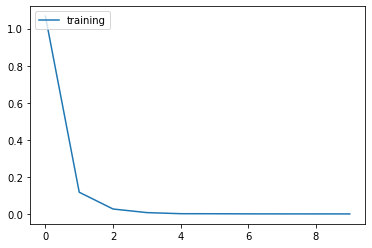

In [19]:
plt.plot(classifier.history['loss'])
#plt.plot(classifier.history['accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
print('테스트 정확도:', test_acc)

32/32 - 13s - loss: 0.3196 - accuracy: 0.9210 - 13s/epoch - 396ms/step
테스트 정확도: 0.9210000038146973


In [21]:
prediction = model.predict(X_test)

In [22]:
predicted_classes = np.argmax(prediction, axis = 1)
print(predicted_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 2 1 2 1 0 1 1 1 2 2 1 1 1 2
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1
 1 1 1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 2 0 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1
 3 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2
 2 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 1 2 2 2
 2 2 2 2 2 1 1 2 2 2 2 2 

In [ ]:
labels = np.argmax(Y_test, axis=1)
print(labels)